In [13]:
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using Base.Threads
using Distributions
using LsqFit
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")

nthreads = 1


In [9]:
data_2 = load("fine_landau_undamped3522_200_alp2_n2_Th3th1_results.jld2")

Dict{String, Any} with 12 entries:
  "run_name"  => "fine_landau_undamped3522_200_alp2_n2_Th3"
  "p_Ini"     => (1, 0.001, 0.01, 0.316231)
  "n_F"       => [-0.0254025, -0.0254025, -0.0254025, -0.0254025, -0.0254025, -…
  "par_evolv" => (0.0, 100.0, 10001, 501, 0.01)
  "n_T"       => [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0  ……
  "E_T"       => [-6.01268e-17, 0.0, -1.00211e-17, -2.00423e-17, -1.00211e-17, …
  "E_f"       => [8.54559e-16, -3.36971e-5, -6.73938e-5, -0.00010109, -0.000134…
  "par_grid"  => (3522, 0.0112828, 200, 0.00502513)
  "S_T"       => [-5.55327e-22, -4.92539e-21, -1.18209e-20, -2.75822e-20, -3.54…
  "Energy_K"  => [1.0005, 1.0005, 1.0005, 1.00051, 1.00052, 1.00052, 1.00053, 1…
  "Energy_E"  => [7.90559e-5, 7.80613e-5, 7.51276e-5, 7.04024e-5, 6.41236e-5, 5…
  "S_F"       => [-1.07596e-17, 5.22556e-7, 1.04511e-6, 1.56764e-6, 2.09016e-6,…

In [16]:
t_i, t_f, M, M_g, dt = data_2["par_evolv"]

(0.0, 100.0, 10001, 501, 0.01)

In [110]:

p0 = [7.90*10^(-5); 0.561111]
@. model(x, p) = p[1]*cos(x*p[2])^2 #* exp(-x*p[3]) #*cos(x*p[5] + p[6])

model (generic function with 1 method)

In [111]:
t_series = [dt*(i-1)*((M-1)÷(M_g-1)) for i in 1:M_g];
fit = curve_fit(model, t_series, data_2["Energy_E"], p0);
fit.param

2-element Vector{Float64}:
 7.895386749385431e-5
 0.5621628653107386

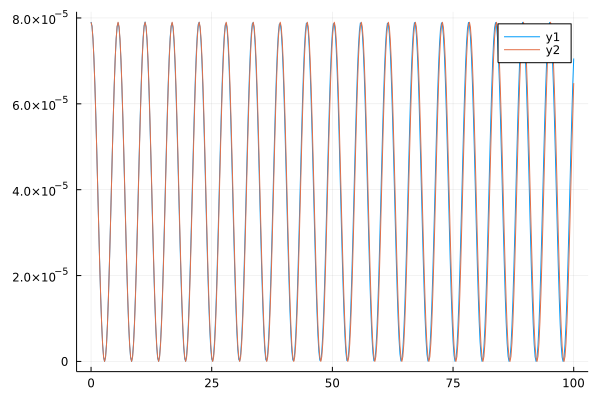

In [112]:
p1 = 7.90*10^(-5); p2 = 0.561111
plot(t_series, data_2["Energy_E"])
#plot!(t_series, model(t_series, fit.param))
plot!(t_series, p1*cos.(p2*t_series).^2)

Fit for undamped with parameters:



$p1 = 7.90*10^{-5}$  $p2 = 0.561111$ for $E_E(t) = p1\; cos(p2*t)^2$


Los parámetros de fiteo son: 

### Caso undamped n = 4

    Lx = 39.738, Nx = 3522, Np = 200, Lp = 0.5

    α = 0.01
    n = 4 (chekeado que la longitud de onda es Lx/4)
    k = 2*π*n/Lx
    θ = 0.001

$E_K = a + b*cos(\omega*t + \alpha)^2$ 

Tenemos $a = 1.0005005$, $b = 0.0000196$ $\omega = 0.562$, $\alpha = -\pi/2$

$E_K = a' + d'*cos(\omega' * t + \alpha')$ 

Tenemos $a'= 1.0005103$, $b'= 0.0000196/2$ $\omega' = 0.562*2$ $\alpha'= - π$

$E_E = p_1 * cos(p_2 * t)^2

Tenemos $p_1 = 1.969*10^{-5} $, $p_2 = 0.5619$ 

### Caso undamped n = 2

Lx = 39.738, Nx = 3522, Np = 200, Lp = 0.5

    α = 0.01
    n = 2 (chekeado que la longitud de onda es Lx/2)
    k = 2*π*n/Lx
    θ = 0.001

Tenemos $p1 = 7.90*10^{-5}$  $p2 = 0.561111$ for $E_E(t) = p1\; cos(p2*t)^2$

$\omega = \; \sqrt{4π} * 0.561111 \;= \;1.989 $


**No entiendo porque no cambian las frequencias entre n = 2 y 4. Bueno, según SHARP comienza cuadrático, puede ser que este bien**

### Caso damped

    Lx = 7.455, Nx = 930, Np = 200, Lp = 0.5

    α = 0.01
    n = 15
    k = 2*π*n/Lx
    θ = 0.001

$E_E = b*cos(\omega*t)^2 e^{-\gamma * t}$ 

Tenemos: $b = 1.450 \; 10^{-7}$, $\omega = 1.512$, $\gamma = 0.03$


#### Note: 

Since we are using a $4\pi$ in the equation for E dot, we need to change E and t to get to the equations in the SHARP paper, for that we have to change time by a factor $\sqrt{4\pi}$. 

$$
\hat t = a t \;\;\;\; \partial_{\hat t} = \frac{1}{a} \partial_t 
$$

\begin{align*}
\partial_t f &= a \partial_{\hat t} f = E \partial_p f = a \hat{E} \partial_p f \\
\partial_t E &= a^2 \partial_{\hat t} \hat{E} = 4\pi S
\end{align*}

Therefore $a^2 = 4\pi$ (the hat variables are the ones in the SHARP paper), or $\hat t = \sqrt{4\pi} t$, or 
$\hat{\omega} = \omega /\sqrt{4\pi}$


Using this factor we get:

#### undamped: #### 

$\omega = \; \sqrt{4π} * 0.562 \;= \;1.9922 $

#### damped: #### 

$\omega = \sqrt{4π} * 1.512 = 5.3599$, $\gamma = \sqrt{4π} * 0.03 = 0.1063$

In [87]:
 0.561111 / sqrt(4π)

0.15828649070703255

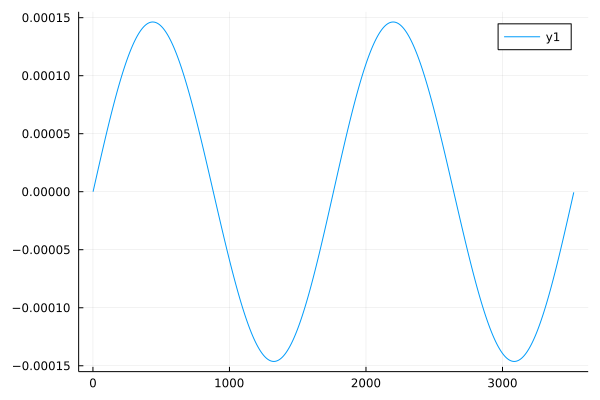

In [88]:
plot(data_2["S_F"])

In [89]:
data_4 = load("fine_landau_3522_200_alp2_n_Th3th1_results.jld2")

Dict{String, Any} with 11 entries:
  "p_F"      => (0.0112828, 0.00502513, 3522, 200, [-0.445413, -0.441796, -0.43…
  "run_name" => "fine_landau_3522_200_alp2_n_Th3"
  "p_Ini"    => (1, 0.001, 0.01, 0.632461)
  "n_F"      => [-0.0254079, -0.0254079, -0.0254078, -0.0254078, -0.0254078, -0…
  "n_T"      => [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0  … …
  "E_T"      => [-4.30443e-20, -1.6574e-18, 2.24885e-18, 6.21045e-18, 1.40691e-…
  "E_f"      => [8.10222e-17, -3.44567e-5, -6.89116e-5, -0.000103363, -0.000137…
  "S_T"      => [-3.93507e-22, 1.26298e-20, 2.59154e-20, 3.73826e-20, 5.04754e-…
  "Energy_K" => [1.0005, 1.0005, 1.0005, 1.0005, 1.0005, 1.00051, 1.00051, 1.00…
  "Energy_E" => [1.97637e-5, 1.95148e-5, 1.87807e-5, 1.75984e-5, 1.60275e-5, 1.…
  "S_F"      => [9.96592e-19, 4.0371e-7, 8.07399e-7, 1.21104e-6, 1.61462e-6, 2.…

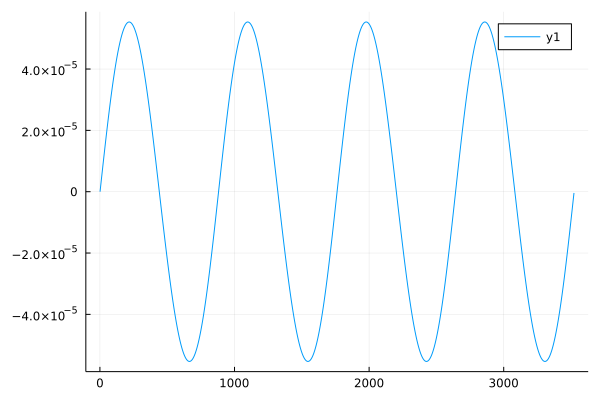

In [90]:
plot(data_4["S_F"])

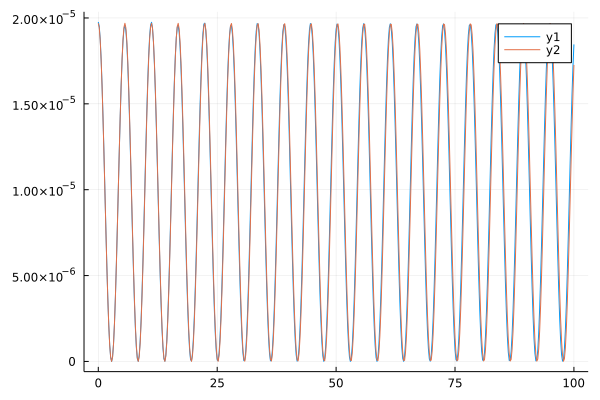

In [109]:
p_4_1 = 1.969*10^(-5) ; p_4_2 = 0.5619
plot(t_series, data_4["Energy_E"])
plot!(t_series, p_4_1 * cos.(p_4_2 * t_series).^2)